In [1]:
#
from qiskit import BasicAer, IBMQ
from qiskit.aqua.algorithms import NumPyMinimumEigensolver, QAOA
from qiskit.aqua.components.optimizers import COBYLA
from qiskit.aqua.components.optimizers import SPSA
from qiskit.circuit.library import TwoLocal
from qiskit.aqua import QuantumInstance
from qiskit import execute
from qiskit.optimization.applications.ising import knapsack
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from collections import OrderedDict
import numpy as np

In [2]:
#
def get_most_likely(result):
    if isinstance(result.eigenstate, dict) or isinstance(result.eigenstate, OrderedDict):
        binary_string = sorted(result.eigenstate.items(), key=lambda kl: kl[1])[-1][0]
        res = np.asarray([int(y) for y in reversed(list(binary_string))])
        return res
    else:
        eigenvector = result.eigenstate if isinstance(result.eigenstate, np.ndarray) else result.eigenstate.to_matrix()
        n = int(np.log2(eigenvector.shape[0]))
        m = np.argmax(np.abs(eigenvector))
        res = np.zeros(n)
        for i in range(n):
            res[i] = m % 2
            m >>= 1
        return res

In [3]:
#
provider = IBMQ.load_account()

values = [100,150,50,200]
weights = [16,32,8,40]
w_max = 64

num_of_values = len(values)

qubitOp, offset = knapsack.get_operator(values, weights, w_max)

print('Number of qubits = ' + str(qubitOp.num_qubits))

Number of qubits = 11


In [4]:
#
npmes = NumPyMinimumEigensolver(qubitOp)
result = npmes.run()

gml = get_most_likely(result)

print(gml)
print('result = ' + str(gml[:num_of_values]))

[1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
result = [1. 0. 1. 1.]


In [7]:
backend = BasicAer.get_backend('statevector_simulator')
seed = 10598

cobyla = COBYLA()
qaoa = QAOA(qubitOp, cobyla, 4)

qaoa.random_seed = seed

quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)

result = qaoa.run(quantum_instance)

gml = get_most_likely(result)

print(gml)
print('result = ' + str(gml[:num_of_values]))

[1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1.]
result = [1. 0. 1. 0.]


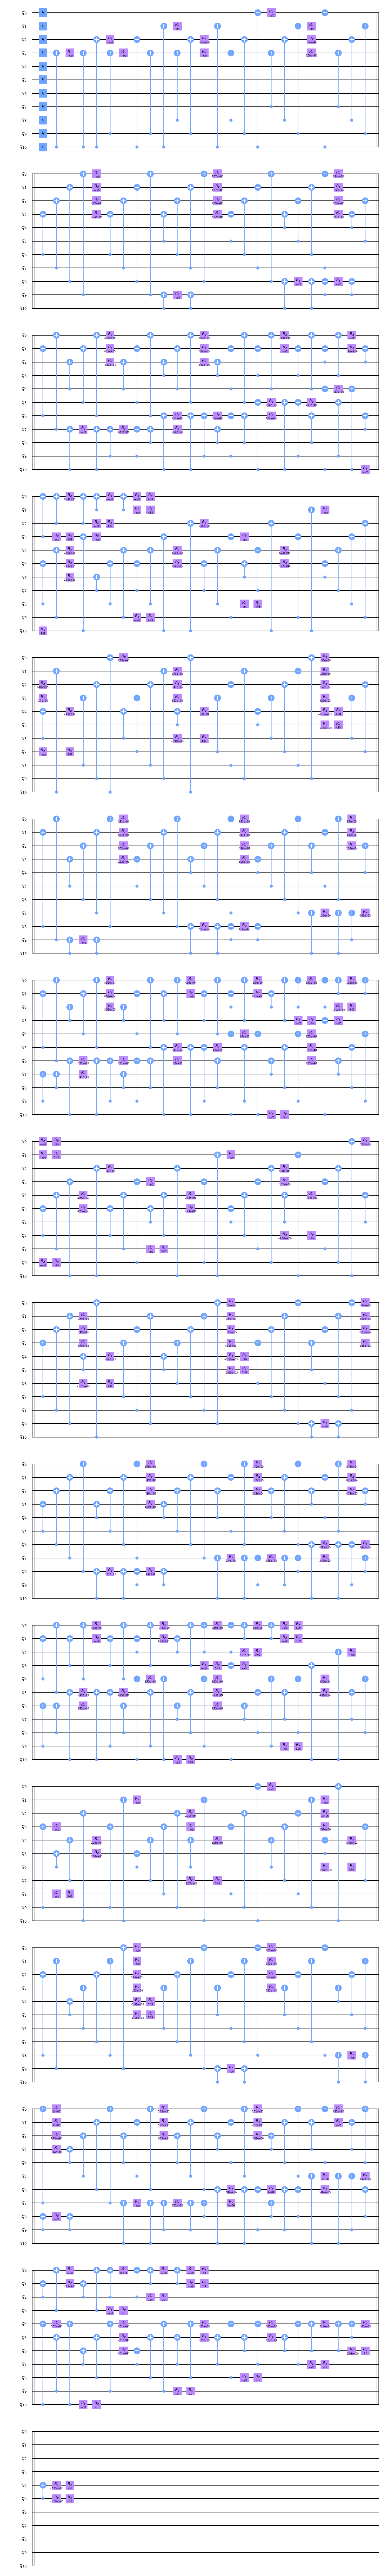

In [8]:
qaoa_qc = qaoa.get_optimal_circuit()
qaoa_qc.draw(output='mpl')

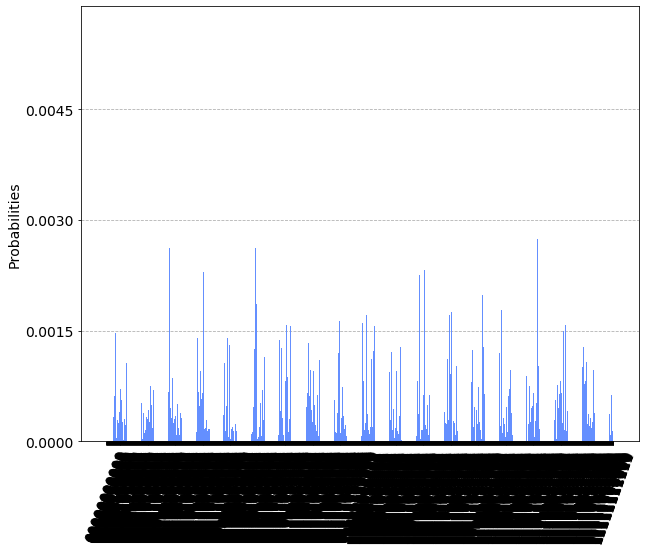

In [9]:
backend = BasicAer.get_backend('statevector_simulator')

simulate = execute(qaoa_qc, backend=backend, shots=512)
qaoa_qc_results = simulate.result()

plot_histogram(qaoa_qc_results.get_counts(),figsize = (10,8),bar_labels = False)

In [10]:
backend = BasicAer.get_backend('statevector_simulator')
seed = 10598

spsa = SPSA(max_trials=300)
qaoa = QAOA(qubitOp, spsa, 4)

qaoa.random_seed = seed

quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)

result = qaoa.run(quantum_instance)

gml = get_most_likely(result)

print(gml)
print('result = ' + str(gml[:num_of_values]))

[1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.]
result = [1. 1. 0. 0.]


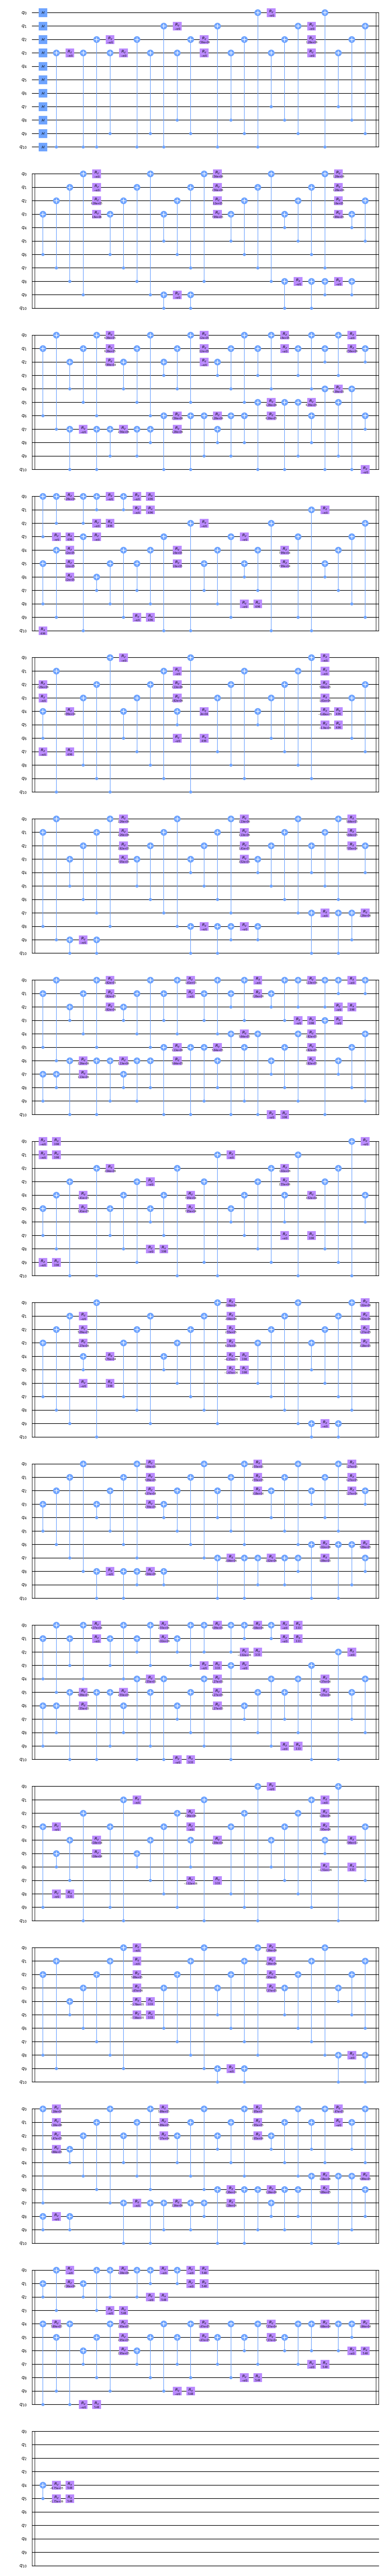

In [11]:
qaoa_qc = qaoa.get_optimal_circuit()
qaoa_qc.draw(output='mpl')

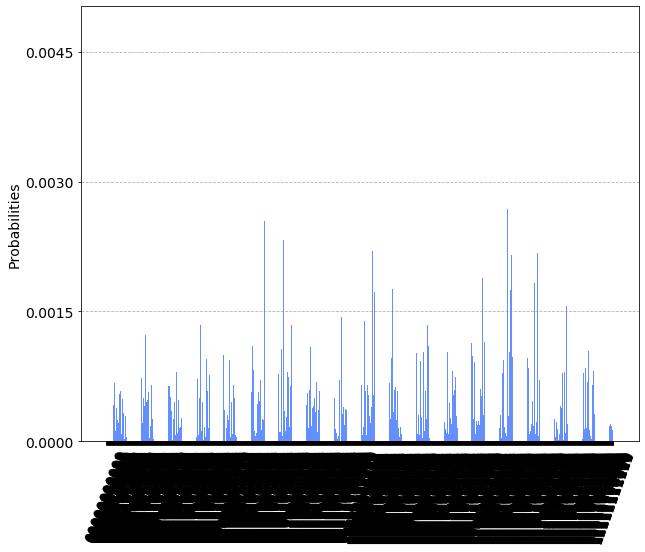

In [12]:
backend = BasicAer.get_backend('statevector_simulator')

simulate = execute(qaoa_qc, backend=backend, shots=512)
qaoa_qc_results = simulate.result()

plot_histogram(qaoa_qc_results.get_counts(),figsize = (10,8),bar_labels = False)

In [13]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright